In [3]:
import numpy as np  
import pandas as pd  
import pandas_datareader as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline
import os
import requests

In [4]:
import cbpro

In [5]:
c = cbpro.PublicClient()

In [6]:
Bitcoin = pd.DataFrame(c.get_product_historic_rates('BTC-USD', start = '2021-01-01T01:00:00', end = '2021-10-07T01:00:00' , granularity = 86400))
Bitcoin.columns= ["Date","Open","High","Low","Close","Volume"]
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date'], unit='s')
Bitcoin.set_index('Date', inplace=True)
Bitcoin.sort_values(by='Date', ascending=True, inplace=True)
Bitcoin

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-02,29039.00,33300.00,29413.29,32225.91,46675.246521
2021-01-03,32008.62,34810.00,32222.88,33080.66,36951.716506
2021-01-04,27678.00,33666.99,33082.84,32019.99,46045.389685
2021-01-05,29891.13,34499.67,32020.22,34030.64,42282.569200
2021-01-06,33352.54,37000.00,34043.91,36859.26,45744.103200
...,...,...,...,...,...
2021-10-03,47120.11,49300.00,47663.74,48233.99,7989.259259
2021-10-04,46916.70,49505.00,48233.99,49245.54,13938.641830
2021-10-05,49057.18,51906.23,49244.13,51493.99,17828.597267


In [9]:
BTC = Bitcoin.drop(["High","Low","Close","Volume"], axis = 1)

In [10]:
BTC

,Open
Date,
2021-01-02,29039.00
2021-01-03,32008.62
2021-01-04,27678.00
2021-01-05,29891.13
2021-01-06,33352.54
...,...
2021-10-03,47120.11
2021-10-04,46916.70
2021-10-05,49057.18


In [12]:
ticker = 'BTC'

In [36]:
t_intervals = 500

In [37]:
iterations = 100

In [38]:
log_returns = np.log(1+BTC.pct_change())

<AxesSubplot:xlabel='Date'>

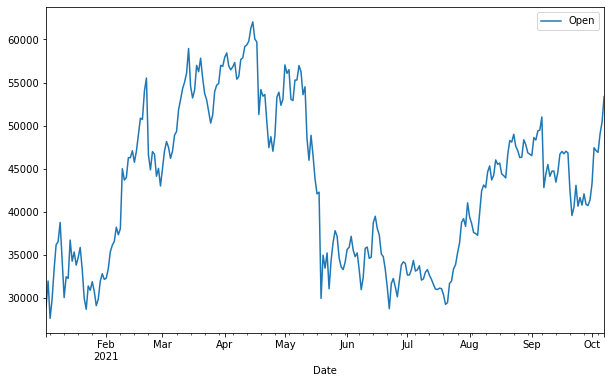

In [39]:
BTC.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

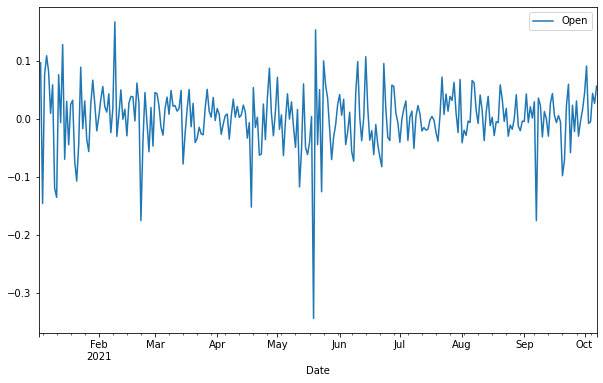

In [40]:
log_returns.plot(figsize=(10,6))

In [41]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (.5 * var)
std = log_returns.std()

In [42]:
daily_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [43]:
S0 = BTC.iloc[-1]
BTCprice_list = np.zeros_like(daily_returns)
BTCprice_list[0] = S0

In [44]:
for t in range(1, t_intervals):
    BTCprice_list[t] = BTCprice_list[t - 1] * daily_returns[t]

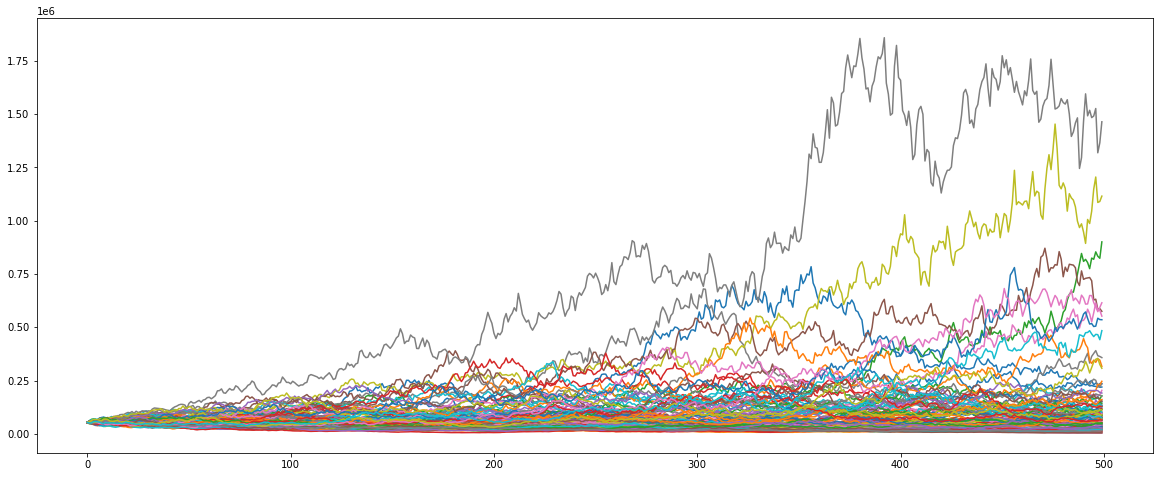

In [45]:
plt.figure(figsize=(20,8))
plt.plot(BTCprice_list);